In [1]:
import numpy as np
import matplotlib.pyplot as plt
from chainconsumer import ChainConsumer

# Problem 1

## A)
$$
\sqrt{\frac{2}{N_{sim}-1}}\approx 1\%
\\
N_{sim}\approx 2\times 10^4
$$


## B)

$$
\sqrt{\frac{N_d-N_p}{N_{sim}-N_d}}\approx 1\%
\\
N_d\approx 3.7\times 10^6
$$


# Problem 3

## Step 1

### 1. a

In [86]:

# data_material = np.random.randint(low=-10, high=10, size = (100, 4))

# # print(cov_material)
# mu_0 = np.mean(data_material, axis=0)
# print(mu_0.shape)
# cov_0 = np.cov(cov_material, rowvar=False)
# print(cov_0.shape)

mu_0 = np.array([1, 2, 3, 4])

cov_0 = np.array([[3, -2, 2, 2.5], [-2, 3, -0.7, 0.8], [2, -0.7, 5, 3], [2.5, 0.8, 3, 4]])

print(cov_0)

[[ 3.  -2.   2.   2.5]
 [-2.   3.  -0.7  0.8]
 [ 2.  -0.7  5.   3. ]
 [ 2.5  0.8  3.   4. ]]


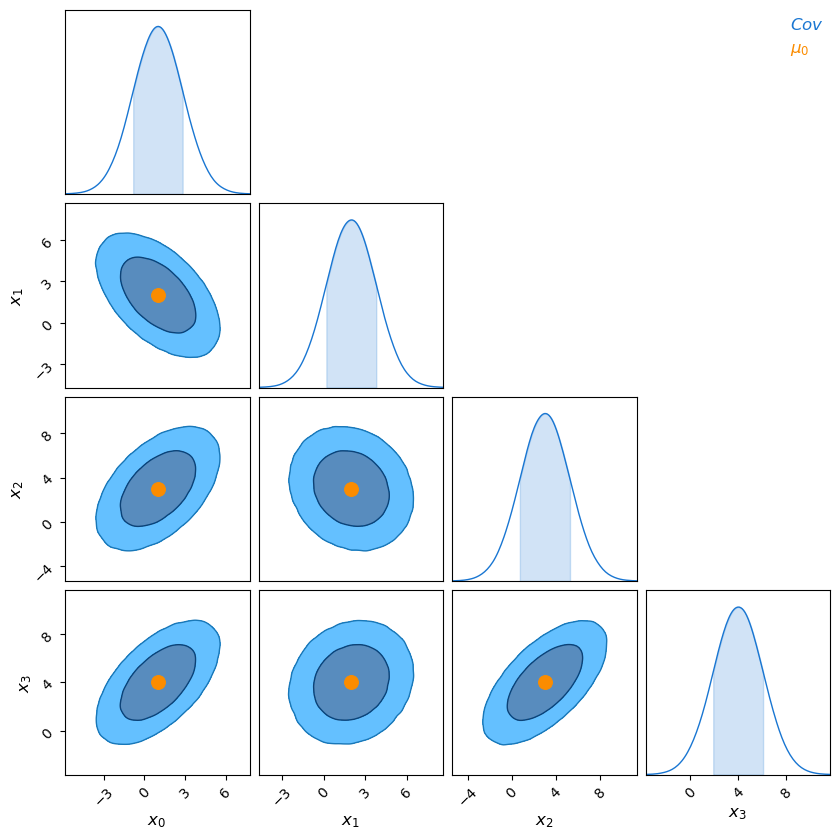

In [87]:
c = ChainConsumer()
c.add_covariance(mu_0, cov_0, parameters=['$x_0$', '$x_1$', '$x_2$', '$x_3$'], name="$Cov$")
c.add_marker(mu_0, parameters=['$x_0$', '$x_1$', '$x_2$', '$x_3$'], name="$\mu_0$", marker_style="o", marker_size=100, color="orange")
c.configure(usetex=False, serif=False)
fig = c.plotter.plot()

fig.set_size_inches(3 + fig.get_size_inches())  # Resize fig for doco. You don't need this.

### 1.b


In [29]:
np.random.seed(114514)
data = np.random.multivariate_normal(mu_0, cov_0, size = 1000)
print(f"the shape of data is {data.shape}")

the shape of data is (1000, 4)


### 1.c

In [30]:
alpha_range = np.linspace(-1, 1, 1001)
np.random.seed(20240522)
v = np.random.randint(-2, 7, 4)
print(v)

[6 3 6 2]


## Step 2 

### 2.a


In [67]:
likelihood = np.zeros(len(alpha_range))



for i in range(len(alpha_range)):
    diff = data[10] - (mu_0 + alpha_range[i] * v)
    likelihood[i] = np.exp(-0.5 * diff @ np.linalg.inv(cov_0) @ diff.T)




(array([419]),)


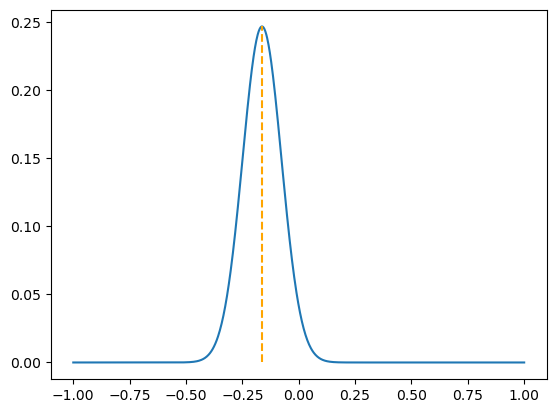

In [68]:
plt.plot(alpha_range, likelihood)
plt.vlines(x=alpha_range[np.where(likelihood==np.max(likelihood))], ymin=0, ymax=np.max(likelihood), color="orange", linestyle="dashed")
print(np.where(likelihood == np.max(likelihood)))

### 2.b


In [50]:
def one_sigma_region(pdf, alpha, CL):
    # normalize
    pdf = pdf/np.trapz(pdf, alpha_range)
    i_max = np.where(pdf==np.max(pdf))[0][0]
    p_max = np.argmax(pdf)
    dp = p_max/1000
    area = 0
    d_alpha = alpha[1] - alpha[0]
    p_now = p_max - dp
    while area <=CL:
        left = pdf[:i_max]
        right = pdf[i_max:]
        diff_l = np.abs(left - p_now)
        diff_r = np.abs(right - p_now)
        i_left = np.where(diff_l==np.min(diff_l))[0][0]
        i_right = np.where(diff_r==np.min(diff_r))[0][0]
        
        area = np.trapz(pdf[i_left: i_max + i_right], dx=d_alpha)
        p_now = p_now - dp
    return alpha[i_left], alpha[i_max + i_right]

In [80]:
pdf = likelihood
alpha = alpha_range

pdf = likelihood/np.trapz(likelihood, alpha_range)
i_max = np.where(pdf==np.max(pdf))[0][0]
p_max = np.argmax(pdf)
dp = p_max/1000
area = 0
d_alpha = alpha[1] - alpha[0]
p_now = p_max - dp
while area <=0.683:
    left = pdf[:i_max]
    right = pdf[i_max:]
    diff_l = np.abs(left - p_now)
    diff_r = np.abs(right - p_now)
    i_left = np.where(diff_l==np.min(diff_l))[0][0]
    i_right = np.where(diff_r==np.min(diff_r))[0][0]

    area = np.trapz(pdf[i_left: i_max + i_right], dx=d_alpha)
    p_now = p_now - dp
# return alpha[i_left], alpha[i_max + i_right]

print(np.trapz(likelihood, alpha_range))
print(alpha_range[i_max])
print(alpha_range[i_left], alpha_range[i_max+i_right])
# print(likelihood/np.trapz(likelihood, alpha_range))
# a = one_sigma_region(likelihood, alpha_range, 0.683)
# print(a)
# print(alpha_range[np.where(likelihood==np.max(likelihood))])
# if (0<a[1]) & (0>a[0]):
#     print("True")
# else:
#     print("False")

0.053327206401450646
-0.16200000000000003
-0.258 -0.06799999999999995


1.0


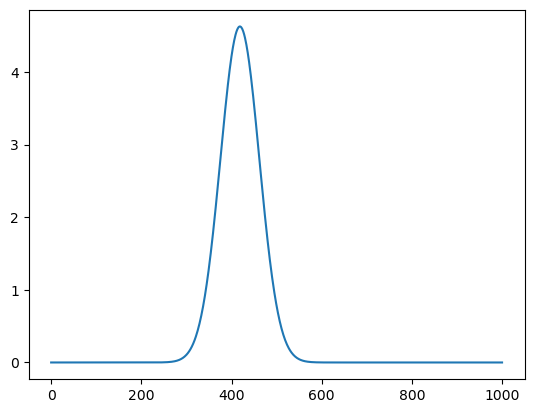

In [75]:
plt.plot(np.arange(len(likelihood)), pdf)
print(np.trapz(likelihood/np.trapz(likelihood, alpha_range), alpha_range))

In [82]:
num = 0
for i in range(1000):
    likelihood = np.zeros(len(alpha_range))
    for j in range(1000):
        diff = data[i] - (mu_0 + alpha_range[j] * v)
        likelihood[j] = np.exp(-0.5 * diff @ np.linalg.inv(cov_0) @ diff.T)
    region = one_sigma_region(likelihood, alpha_range, 0.683)
    if ((0>region[0]) & (0<region[1])):
        num = num + 1

In [83]:
print(num/1000)

0.685


In [35]:
np.trapz(likelihood, alpha_range)

0.053327206401450646

In [3]:
a = np.arange(100)
print(np.argmax(a))

99


In [1]:
import numpy as np
print()

NameError: name 'np' is not defined